In [31]:
# Importing libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
sns.set_style('darkgrid')

In [32]:
# Loading the dataset
data  = pd.read_csv('Health Graduate Outcomes.csv')

# Preview the first few rows
data.head()

,STATISTIC,Statistic Label,TLIST(A1),Graduation Year,C03143V03795,Fields of Education and Training,C03433V04141,Years since Graduation,C03544V04280,Graduate Outcomes,C03919V04671,Gender,UNIT,VALUE
0,HGO03C01,Number of Health Graduates,2010,2010,912,Medicine,1,1,1,Employment only,10,Male,Number,65
1,HGO03C01,Number of Health Graduates,2010,2010,912,Medicine,1,1,1,Employment only,20,Female,Number,105
2,HGO03C01,Number of Health Graduates,2010,2010,912,Medicine,1,1,1,Employment only,-,All genders,Number,170
3,HGO03C01,Number of Health Graduates,2010,2010,912,Medicine,1,1,2,Employment and Education,10,Male,Number,35
4,HGO03C01,Number of Health Graduates,2010,2010,912,Medicine,1,1,2,Employment and Education,20,Female,Number,60


In [33]:
# Display info of dataset
data.info

<bound method DataFrame.info of      STATISTIC             Statistic Label  TLIST(A1)  Graduation Year  \
0     HGO03C01  Number of Health Graduates       2010             2010   
1     HGO03C01  Number of Health Graduates       2010             2010   
2     HGO03C01  Number of Health Graduates       2010             2010   
3     HGO03C01  Number of Health Graduates       2010             2010   
4     HGO03C01  Number of Health Graduates       2010             2010   
...        ...                         ...        ...              ...   
4351  HGO03C01  Number of Health Graduates       2020             2020   
4352  HGO03C01  Number of Health Graduates       2020             2020   
4353  HGO03C01  Number of Health Graduates       2020             2020   
4354  HGO03C01  Number of Health Graduates       2020             2020   
4355  HGO03C01  Number of Health Graduates       2020             2020   

      C03143V03795 Fields of Education and Training  C03433V04141  \
0         

In [34]:
# Summary statistics for numerical columns
data.describe()

,TLIST(A1),Graduation Year,C03143V03795,C03433V04141,Years since Graduation,VALUE
count,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000
mean,2015.000000,2015.000000,912.500000,6.000000,6.000000,106.477273
std,3.162641,3.162641,0.500057,3.162641,3.162641,260.192355
min,2010.000000,2010.000000,912.000000,1.000000,1.000000,0.000000
25%,2012.000000,2012.000000,912.000000,3.000000,3.000000,0.000000
50%,2015.000000,2015.000000,912.500000,6.000000,6.000000,0.000000
75%,2018.000000,2018.000000,913.000000,9.000000,9.000000,75.000000
max,2020.000000,2020.000000,913.000000,11.000000,11.000000,1470.000000


In [35]:
# Getting the number of rows and columns
data.shape

(4356, 14)

In [36]:
# Getting the column names
data.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'Graduation Year',
       'C03143V03795', 'Fields of Education and Training', 'C03433V04141',
       'Years since Graduation', 'C03544V04280', 'Graduate Outcomes',
       'C03919V04671', 'Gender', 'UNIT', 'VALUE'],
      dtype='object')

In [37]:
# Checking column types
data.dtypes

STATISTIC                           object
Statistic Label                     object
TLIST(A1)                            int64
Graduation Year                      int64
C03143V03795                         int64
Fields of Education and Training    object
C03433V04141                         int64
Years since Graduation               int64
C03544V04280                        object
Graduate Outcomes                   object
C03919V04671                        object
Gender                              object
UNIT                                object
VALUE                                int64
dtype: object

In [38]:
# Checking for missing values
data.isnull().sum()

STATISTIC                           0
Statistic Label                     0
TLIST(A1)                           0
Graduation Year                     0
C03143V03795                        0
Fields of Education and Training    0
C03433V04141                        0
Years since Graduation              0
C03544V04280                        0
Graduate Outcomes                   0
C03919V04671                        0
Gender                              0
UNIT                                0
VALUE                               0
dtype: int64

In [39]:
#unique graduate outcomes
data['Graduate Outcomes'].unique()

array(['Employment only', 'Employment and Education', 'Education only',
       'Neither Employment nor Education', 'Not Captured',
       'All Graduate Outcomes'], dtype=object)

In [40]:
data['Fields of Education and Training'].unique()

array(['Medicine', 'Nursing and midwifery'], dtype=object)

In [41]:
data[['Graduation Year', 'Graduate Outcomes', 'VALUE']].value_counts()

Graduation Year  Graduate Outcomes                 VALUE
2020             Education only                    0        66
                 Neither Employment nor Education  0        64
                 Not Captured                      0        61
                 Employment and Education          0        60
2019             Education only                    0        60
                                                            ..
2014             Employment only                   755       1
                                                   775       1
                                                   825       1
                                                   870       1
2015             Employment only                   230       1
Name: count, Length: 1015, dtype: int64

In [42]:
# Select the relevant columns and calculate unique combinations with their counts
unique_counts = data[['Graduation Year', 'Fields of Education and Training', 'Gender', 'VALUE']].value_counts()

# Resetting index to display results as a DataFrame
unique_counts_df = unique_counts.reset_index(name = 'Count')

# Display the result
print(unique_counts_df)


      Graduation Year Fields of Education and Training       Gender  VALUE  \
0                2020            Nursing and midwifery         Male      0   
1                2020                         Medicine       Female      0   
2                2020                         Medicine  All genders      0   
3                2020                         Medicine         Male      0   
4                2020            Nursing and midwifery       Female      0   
...               ...                              ...          ...    ...   
1131             2013            Nursing and midwifery       Female     45   
1132             2013            Nursing and midwifery       Female     55   
1133             2013            Nursing and midwifery       Female     65   
1134             2013            Nursing and midwifery       Female     75   
1135             2020            Nursing and midwifery         Male    125   

      Count  
0        63  
1        62  
2        62  
3      

In [43]:
data['VALUE'].mean()

106.47727272727273

In [44]:
data['VALUE'].median()

0.0

In [45]:
data['VALUE'].max()

1470

In [46]:
data['VALUE'].min()

0

In [47]:
# Getting descriptive statistics for the VALUE column
data['VALUE'].describe()

count    4356.000000
mean      106.477273
std       260.192355
min         0.000000
25%         0.000000
50%         0.000000
75%        75.000000
max      1470.000000
Name: VALUE, dtype: float64

# Insight 1: Trends in Graduate Outcomes Over Time

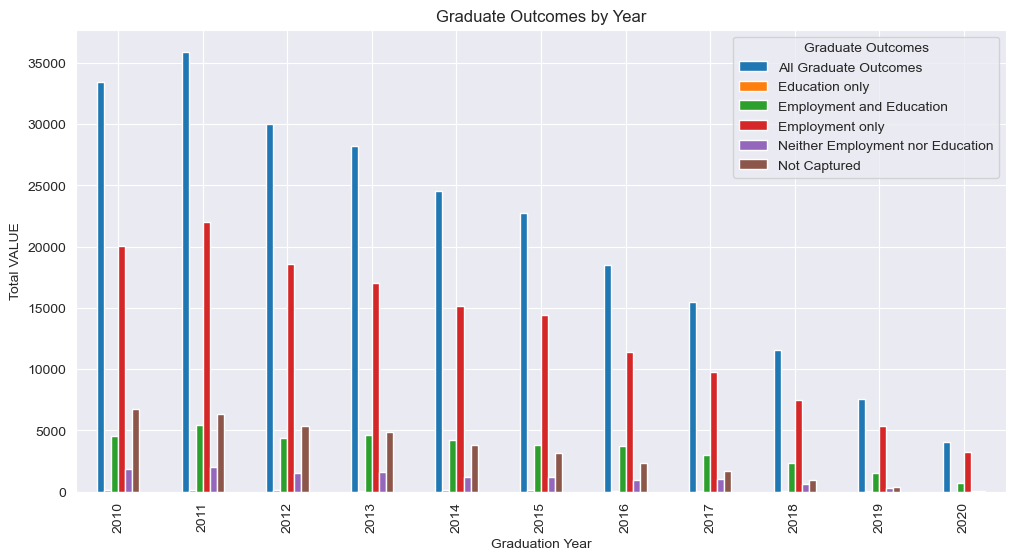

In [48]:
# Grouping the data by Graduation Year and Graduate Outcomes, by summing the VALUE for each group
grad_outcomes_trend = data.groupby(['Graduation Year', 'Graduate Outcomes'])['VALUE'].sum().unstack()

# Plotting the data with a title
grad_outcomes_trend.plot(kind='bar', figsize=(12, 6))
plt.title('Graduate Outcomes by Year') 
plt.xlabel('Graduation Year')          
plt.ylabel('Total VALUE')              
plt.legend(title='Graduate Outcomes')  
plt.show()


# Insight 2: Gender Differences in Graduate Outcomes

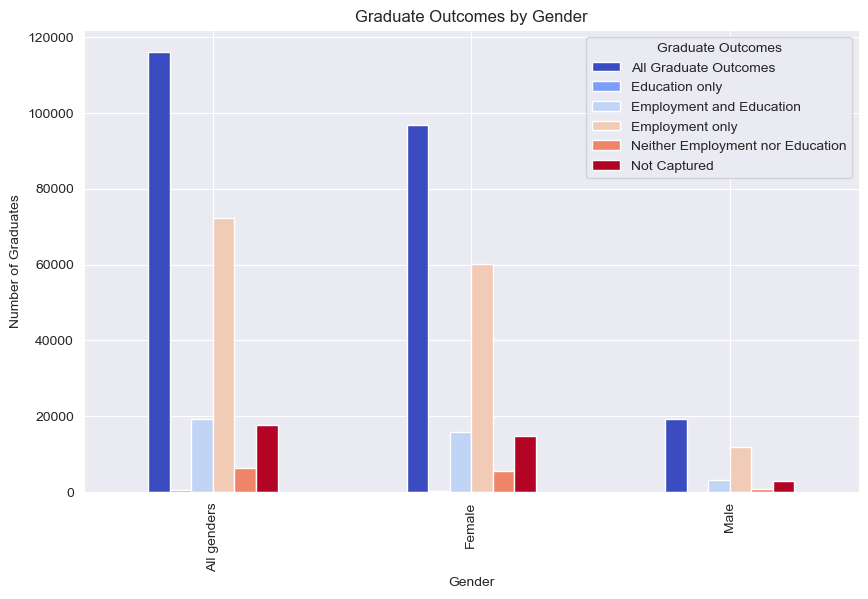

In [49]:
# Aggregating data by Gender and Graduate Outcomes
gender_dt = data.groupby(['Gender', 'Graduate Outcomes'])['VALUE'].sum().unstack()

# Plotting the data with a title
gender_dt.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title('Graduate Outcomes by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Graduates')
plt.show()


# Insight 3: Impact of Years Since Graduation on Outcomes

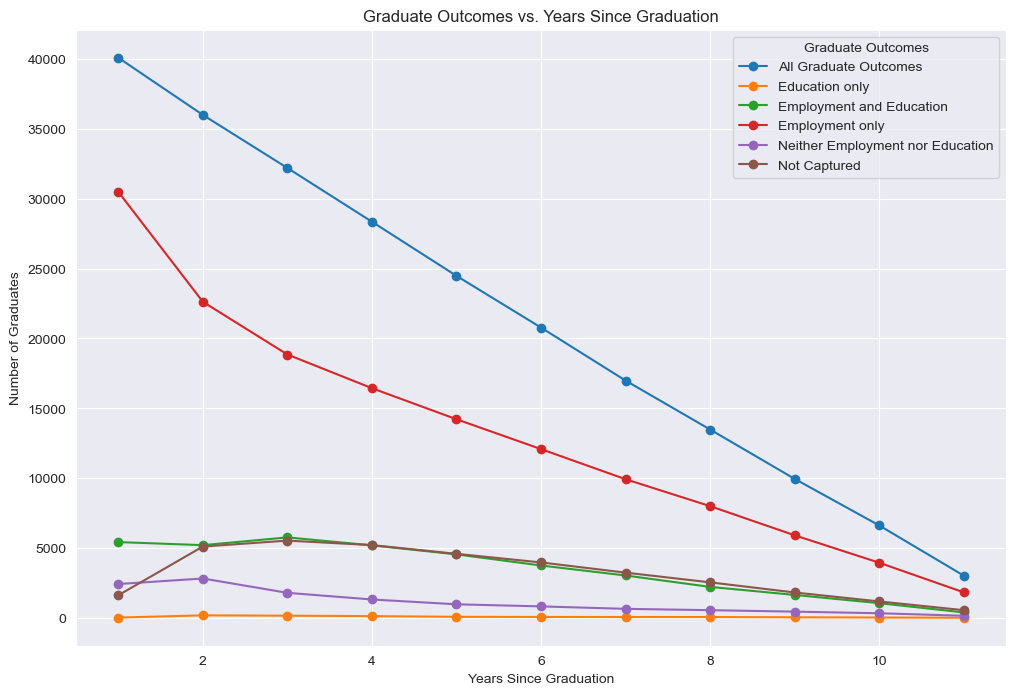

In [50]:
# Aggregating data by Years since Graduation and Graduate Outcomes
time_dt = data.groupby(['Years since Graduation', 'Graduate Outcomes'])['VALUE'].sum().unstack()

# Plotting the data with a title
time_dt.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Graduate Outcomes vs. Years Since Graduation')
plt.xlabel('Years Since Graduation')
plt.ylabel('Number of Graduates')
plt.legend(title='Graduate Outcomes')
plt.show()


# Insight 4: Three Statistical Tests of Field Specific Differences in Graduate Outcomes

i)  ANOVA test

In [51]:

# Performing one way ANOVA to compare the means of 'VALUE' across different Fields of Education and Training
# Getting unique fields
fields = data['Fields of Education and Training'].unique()  
values = [data[data['Fields of Education and Training'] == field]['VALUE'] 
          for field in fields]

# Runing ANOVA
result = stats.f_oneway(*values)

# Printing the result
print("ANOVA Result: F-statistic = " + str(result.statistic), "p-value = " + str(result.pvalue))

if result.pvalue < 0.05:
    print("There is a big difference in the average graduate outcomes between different fields of education.")
else:
    print("There is no big difference in the average graduate outcomes between different fields of education.")


ANOVA Result: F-statistic = 196.82910517827392 p-value = 9.105770819656876e-44
There is a big difference in the average graduate outcomes between different fields of education.


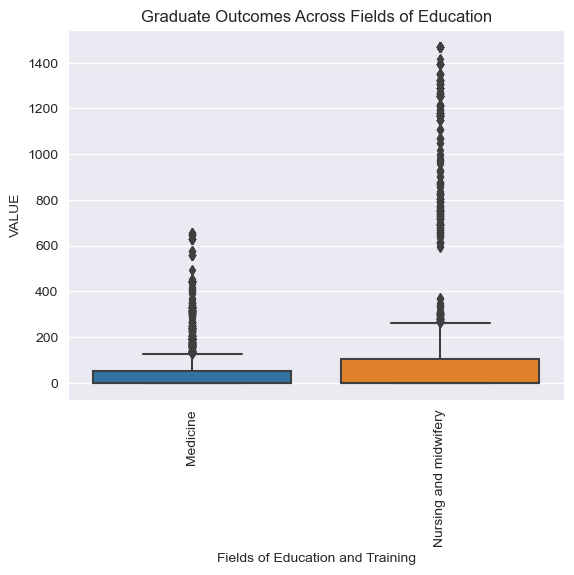

In [52]:
# Creating a box plot to show the distribution of VALUE across different fields of education
sns.boxplot(x='Fields of Education and Training', y = 'VALUE', data = data)
plt.xticks(rotation = 90)
plt.title('Graduate Outcomes Across Fields of Education')
plt.show()


ii) T-test

In [53]:
# Splitting the data by gender
male_grads = data[data['Gender'] == 'Male']['VALUE']
female_grads = data[data['Gender'] == 'Female']['VALUE']

# Perform t-test
t_stat, p_value = stats.ttest_ind(male_grads, female_grads)

# Print the result
print("T-test Result: t-statistic = " + str(t_stat), "p-value = " +str(p_value))

if p_value < 0.05:
    print("There is a big difference in the graduate outcomes between males and females.")
else:
    print("There is no big difference in the graduate outcomes between males and females.")


T-test Result: t-statistic = -13.67506350274108 p-value = 2.6539693791275286e-41
There is a big difference in the graduate outcomes between males and females.


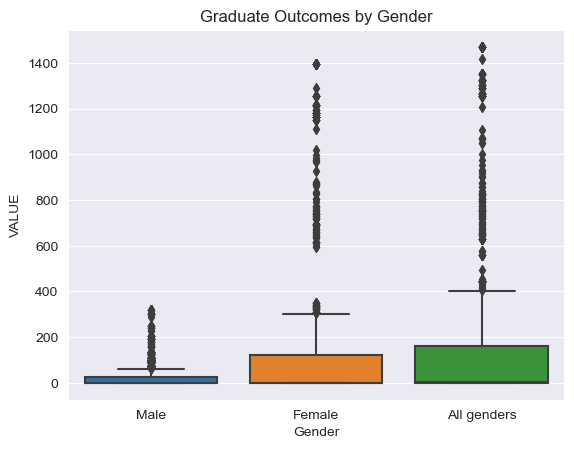

In [54]:
# Creating a box plot to show the distribution of VALUE across different genders
sns.boxplot(x='Gender', y='VALUE', data = data)
plt.title('Graduate Outcomes by Gender')
plt.show()


iii) Chi-Square test

In [55]:
# Creatting a contingency for Gender vs Graduate Outcomes
category_counts = pd.crosstab(data['Gender'], data['Graduate Outcomes'])

# Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(category_counts)

# Print the result
print("Chi-Square Result: chi2-statistic = " + str(chi2_stat), "p-value = " + str(p_value))

if p_value < 0.05:
    print("There is a big relationship between Graduate Outcomes and Gender.")
else:
    print("There is no big relationship between Graduate Outcomes and Gender.")


Chi-Square Result: chi2-statistic = 0.0 p-value = 1.0
There is no big relationship between Graduate Outcomes and Gender.


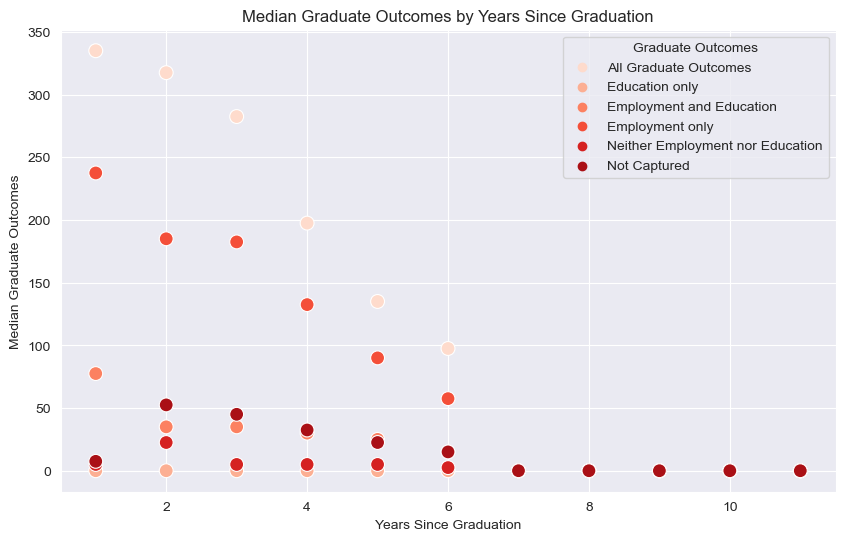

In [56]:
# Grouping the data by Years since Graduation, Graduate Outcomes and calculate the median of VALUE
median_data = data.groupby(['Years since Graduation', 'Graduate Outcomes'])['VALUE'].median().reset_index()

# Plotting the median values with a red shades palette
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years since Graduation', y='VALUE', hue='Graduate Outcomes', data=median_data, palette='Reds', s=100, marker='o')

plt.title('Median Graduate Outcomes by Years Since Graduation')
plt.xlabel('Years Since Graduation')
plt.ylabel('Median Graduate Outcomes')
plt.legend(title='Graduate Outcomes')
plt.show()

